In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# INFOBANK15 DATASET

In [185]:
df_bank = pd.read_csv("INFOBANK15cleaned.csv", delimiter=';')

In [186]:
df_bank.iloc[0:986]

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah
0,23/12/2016,"576,13","573,42","583,95","571,82"
1,27/12/2016,"582,88","573,62","584,16","571,97"
2,28/12/2016,"594,3","587,15","596,84","585,79"
3,29/12/2016,"611,62","597,09","612,95","595,25"
4,30/12/2016,"613,8","612,84","618,86","610,75"
...,...,...,...,...,...
981,19/01/2021,"1071,04","1082,71","1083,66","1062,21"
982,20/01/2021,"1097,88","1079,1","1101,36","1074,55"
983,21/01/2021,"1084,54","1112,26","1115,37","1084,21"
984,22/01/2021,"1076,36","1089,3","1093,93","1072,08"


In [187]:
df_bank.iloc[986:]

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah
986,26/01/2021,"1055,23","1073,56","1076,57","1054,37"
987,27/01/2021,"1047,79","1055,83","1066,2","1033,96"
988,28/01/2021,"1035,64","1040,05","1055,65","1025,74"
989,29/01/2021,"995,47","1043,47","1056,76","993,6"
990,01/02/2021,"1019,73","997,33","1025,85","959,22"
...,...,...,...,...,...
1469,10/01/2023,"1075,98","1111,33","1111,33","1071,49"
1470,11/01/2023,"1056,63","1075,98","1075,98","1054,35"
1471,12/01/2023,"1078,08","1056,7","1089,68","1056,7"
1472,13/01/2023,"1072,92","1078,15","1082,06","1065,78"


In [188]:
df_bank['Terakhir'] = [item.replace(',',".") for item in df_bank['Terakhir']]

In [189]:
df_bank['Pembukaan'] = [item.replace(',',".") for item in df_bank['Pembukaan']]

In [190]:
df_bank['Tertinggi'] = [item.replace(',',".") for item in df_bank['Tertinggi']]
df_bank['Terendah'] = [item.replace(',',".") for item in df_bank['Terendah']]

In [191]:
df_bank['Terakhir'] = df_bank['Terakhir'].astype(float)
df_bank['Pembukaan'] = df_bank['Pembukaan'].astype(float)
df_bank['Tertinggi'] = df_bank['Tertinggi'].astype(float)
df_bank['Terendah'] = df_bank['Terendah'].astype(float)

In [192]:
df_bank['Tanggal'] = pd.to_datetime(df_bank['Tanggal'])

In [193]:
df_bank = df_bank.set_index(['Tanggal'])

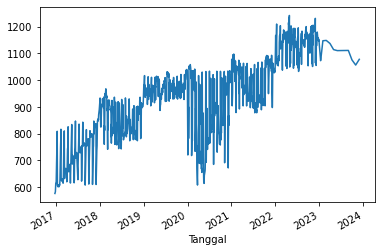

In [194]:
df_bank['Terakhir'].plot()

In [196]:
# Assuming you have a DataFrame named 'infobank15' containing high, low, and close prices
# Create a new column to store the True Range values
df_bank['TrueRange'] = np.nan

# Calculate True Range for each row
for i in range(1, len(df_bank)):
    high = df_bank['Tertinggi'].iloc[i]
    low = df_bank['Terendah'].iloc[i]
    close_prev = df_bank['Terakhir'].iloc[i-1]
    
    true_range = max(high - low, abs(high - close_prev), abs(low - close_prev))
    df_bank['TrueRange'].iloc[i] = true_range

# Calculate the Average True Range using the rolling mean
window = 14  # ATR window size
df_bank['ATR'] = df_bank['TrueRange'].rolling(window).mean().fillna(0)

print(df_bank['ATR'])

Tanggal
2016-12-23     0.000000
2016-12-27     0.000000
2016-12-28     0.000000
2016-12-29     0.000000
2016-12-30     0.000000
                ...    
2023-10-01    15.786429
2023-11-01    16.700714
2023-12-01    18.387143
2023-01-13    18.888571
2023-01-16    18.915714
Name: ATR, Length: 1474, dtype: float64


In [197]:
# Calculate price change
price_change = df_bank['Terakhir'].diff()

# Calculate upward price change and downward price change
upward_price_change = price_change.where(price_change > 0, 0)
downward_price_change = -price_change.where(price_change < 0, 0)

# Calculate average gain and average loss over the 14-day window
average_gain = upward_price_change.rolling(window=14).mean()
average_loss = downward_price_change.rolling(window=14).mean()

# Calculate the relative strength (RS)
relative_strength = average_gain / average_loss

# Calculate the relative strength index (RSI)
rsi = 100 - (100 / (1 + relative_strength))

# Add the RSI values to the DataFrame
df_bank['RSI'] = rsi

In [198]:
df_bank.drop(['TrueRange'],axis=1,inplace=True)

In [200]:
#Volatility Calculation

df_bank['returns'] = df_bank['Terakhir'].pct_change()

window = 30
df_bank['volatilitas'] = df_bank['returns'].rolling(window).std() * np.sqrt(window)
trading_days_per_year = 252
df_bank['volatilitas'] = df_bank['volatilitas'] * np.sqrt(trading_days_per_year)


In [222]:
#Creating MACD
df_bank['ema12'] = df_bank['Terakhir'].ewm(span=12, adjust=False).mean()
df_bank['ema26'] = df_bank['Terakhir'].ewm(span=26, adjust=False).mean()

#Calculate the MACD line by subtracting the 26-day EMA from the 12-day EMA:
df_bank['MACD'] = df_bank['ema12'] - df_bank['ema26']

In [204]:
df_bank.fillna(0,inplace= True)

In [224]:
#df_bank.drop(['returns'],axis=1,inplace=True)
#df_bank.drop(['Tertinggi'],axis=1,inplace=True)
#df_bank.drop(['Terendah'],axis=1,inplace=True)
df_bank.drop(['ema12'],axis=1,inplace=True)
df_bank.drop(['ema26'],axis=1,inplace=True)

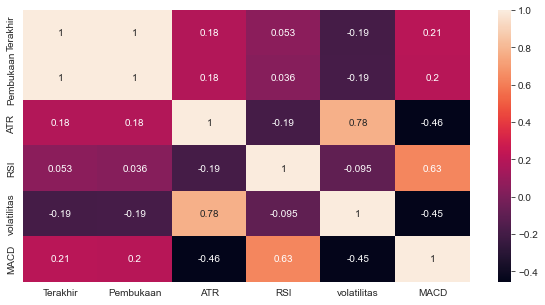

In [225]:
fig = plt.figure(figsize= (10,5))
sns.heatmap(df_bank.corr(), annot=True)
sns.set_style("whitegrid")

# IDR Dataset

In [226]:
df_idr = pd.read_csv("IDR=X.csv")

In [227]:
df_idr = df_idr[['Date','Close']]

In [228]:
df_idr['Date'] = pd.to_datetime(df_idr['Date'])

In [229]:
df_idr = df_idr.rename(columns={'Date': 'Tanggal','Close':'Close IDR'})

In [230]:
df_idr = df_idr.set_index('Tanggal')

# Merge INFOBANK15 & IDR

In [231]:
#merge df_bank and df_idr
df = pd.merge(df_bank,df_idr,how='inner',left_index=True,right_index=True)

In [232]:
df.dropna(inplace=True)

# Consumer Confidence Dataset

In [179]:
import datetime as dt

In [235]:
df_cc = pd.read_excel('ConsumerConfidence.xlsx')

In [237]:
df_cc = df_cc.rename(columns={'Release Date':'Tanggal','Actual':'Consumer Confidence'})

In [240]:
df_cc = df_cc.set_index('Tanggal')

In [241]:
df_cc = df_cc['Consumer Confidence']

In [246]:
all_df = pd.merge(df, df_cc , on='Tanggal', how='outer')

In [249]:
all_df.isnull().sum()

Terakhir               33
Pembukaan              33
ATR                    33
RSI                    33
volatilitas            33
MACD                   33
Close IDR              33
Consumer Confidence    78
dtype: int64

In [248]:
all_df['Consumer Confidence']= all_df['Consumer Confidence'].fillna(method='ffill')

In [250]:
all_df.loc['2017-01-11':'2017-02-03','Consumer Confidence'] = 115.4
all_df.loc['2016-12-23':'2017-01-03','Consumer Confidence'] = 115.9

# Dataset Emas

In [253]:
df_emas = pd.read_excel("Data-Historis-Emas-Berjangka.xlsx")

In [254]:
df_emas['Tanggal'] = pd.to_datetime(df_emas['Tanggal'])

In [256]:
df_emas = df_emas.set_index('Tanggal')

In [259]:
df_emas.sort_index(inplace = True)

In [260]:
df_emas = df_emas.rename(columns={'Terakhir ':'Emas USD'})

In [262]:
df_emas = df_emas['Emas USD']

In [264]:
temp_df = pd.merge(all_df,df_emas,how='inner',left_index=True,right_index=True)

# Dataset BI Rate & Inflasi

In [265]:
df_rate = pd.read_excel("BI Rate.xlsx")

In [266]:
df_rate['Tanggal']= pd.to_datetime(df_rate['Tanggal'])
df_rate = df_rate.set_index("Tanggal")


In [268]:
temp_df = pd.merge(temp_df,df_rate,how='inner',left_index=True,right_index=True)

In [269]:
all_df = temp_df.copy()

In [270]:
all_df = all_df.dropna()

In [273]:
all_df.to_csv('dataset TA2.csv',index=True)

# Pre-Process

In [1]:
fig = plt.figure(figsize= (10,5))
sns.heatmap(all_df.corr(), annot=True)
sns.set_style("whitegrid")

NameError: name 'plt' is not defined